### Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import metrics

### Data Collection And Preprocessing

In [3]:
df = pd.read_csv("C:\\Users\\91797\\Downloads\\archive\\car data.csv")

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.shape

(301, 9)

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type .value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder only to the categorical columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


### Label The Data

In [12]:
x = df.drop(['Car_Name','Selling_Price'],axis= 1)
y = df['Selling_Price']

In [13]:
print(x)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          2            0             1   
1    2013           9.54       43000          1            0             1   
2    2017           9.85        6900          2            0             1   
3    2011           4.15        5200          2            0             1   
4    2014           6.87       42450          1            0             1   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             1   
297  2015           5.90       60000          2            0             1   
298  2009          11.00       87934          2            0             1   
299  2017          12.50        9000          1            0             1   
300  2016           5.90        5464          2            0             1   

     Owner  
0        0  
1        0  
2        0  
3        0 

### Splitting the data into Training data and Tedt Data

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [15]:
x_train.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
235,2017,9.40,15141,2,0,1,0
106,2014,3.45,16500,2,1,1,1
10,2017,3.60,2135,2,0,1,0
152,2012,0.99,13000,2,1,1,0
77,2004,12.35,135154,2,0,0,0


In [16]:
y_train.head()

235    9.10
106    1.35
10     2.85
152    0.50
77     1.50
Name: Selling_Price, dtype: float64

### Model Training

1. Linear Regression

In [17]:
# Loading the linear regression model
le = LinearRegression()

In [18]:
le.fit(x_train,y_train)

LinearRegression()

In [19]:
# prediction of training data and testing data
train_pred = le.predict(x_train)
test_pred = le.predict(x_test)

In [20]:
print(train_pred)
print(test_pred)

[ 6.78487861e+00  1.03052148e+00  4.33053370e+00  2.19376150e-02
  3.57946207e+00  2.79503372e+00  1.43719894e+00  4.14889545e-01
  1.61166418e+00  1.12839641e+00  4.32086309e+00  6.17477452e+00
  9.29097627e-01  7.35592155e-01  6.15378778e+00  3.42694561e+00
  2.32984882e+00  7.50014006e+00  4.61811711e+00  4.43437311e+00
  4.45915634e+00  2.73352428e+00  4.44377264e+00  1.71378422e+00
  2.49318608e-01  3.94331375e+00  1.37445456e+00  4.61754769e+00
  1.38595068e+00  7.35605367e+00  7.24473016e+00  6.54331682e+00
  2.29055849e+00  2.19058216e+01  2.19873970e+00  5.64492151e+00
  2.82714047e+00  7.68311323e+00  5.67039850e+00  1.00273475e+01
  1.99828812e+00  2.37716894e+00  1.22731322e+00  2.40303328e+00
  9.94390646e+00  2.01662591e+00 -6.42391420e-01  5.42943934e+00
  1.14107420e+01 -5.10458803e-03  1.09479248e+00  1.61329534e+00
  5.38687939e+00  1.36601921e+00  7.71862076e+00  1.84430864e+01
  2.49779943e+00  1.56000342e-01  1.81959532e+00  9.31246211e+00
  3.96558814e+00  7.02797

### Model Evaluation

In [21]:
# R squared Error
error_train = metrics.r2_score(y_train,train_pred)
print('R squared Error of training data:',error_train)

error_test = metrics.r2_score(y_test,test_pred)
print('R squared Error of testing data:',error_test)

R squared Error of training data: 0.8838169193709797
R squared Error of testing data: 0.8401532365377788


### Visualization 

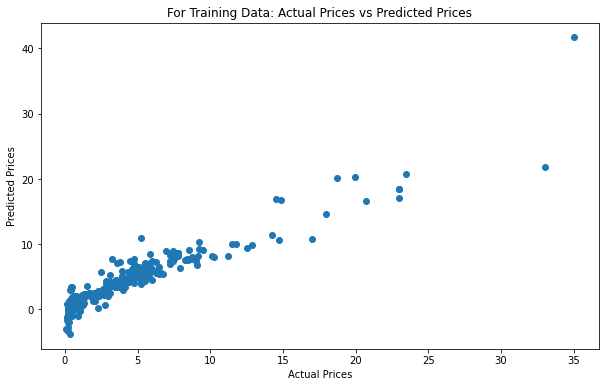

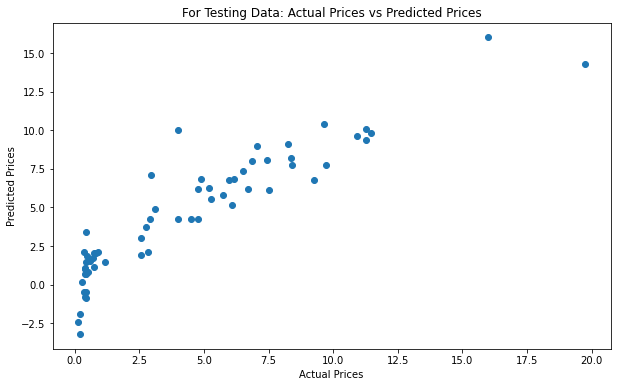

In [22]:
plt.figure(figsize =(10,6))
plt.scatter(y_train,train_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('For Training Data: Actual Prices vs Predicted Prices')
plt.show()

plt.figure(figsize =(10,6))
plt.scatter(y_test,test_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('For Testing Data: Actual Prices vs Predicted Prices')
plt.show()